In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 11.1.1 Standard distributions

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 432x288 with 0 Axes>

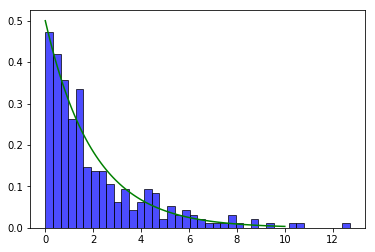

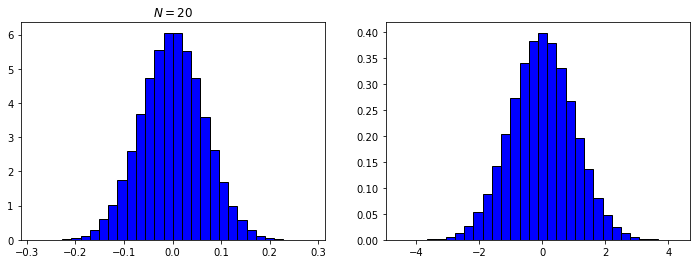

<Figure size 432x288 with 0 Axes>

In [2]:
# Exponential distribution
N = 100
lambda_ = 0.5
y = np.linspace(0, 10, N)
py = lambda_*np.exp(-lambda_*y)
plt.figure()
plt.plot(y,py,c='green')

z = np.random.uniform(0,1,3*N)
yz = -1/lambda_*np.log(1-z)
pyz = lambda_*np.exp(-lambda_*yz)
# plt.scatter(yz,pyz,marker='o', s=50, c='',edgecolors='blue')
plt.hist(yz, bins=40,normed=1,color='blue',edgecolor="black",alpha=0.7)

# Gaussian distribution
n = 100000
N = 20
X = np.zeros([N, n])
for i in range(N):
    X[i,:] = np.random.uniform(low = 0, high = 1, size = n)
    
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.hist(X.mean(axis=0)-.5, bins=30, normed=1, facecolor='b', edgecolor='black')
plt.title('$N = 20$')

x1 = np.random.uniform(0,1,n)
x2 = np.random.uniform(0,1,n)
y1 = np.sqrt(-2*np.log(x1)) * np.cos(2*np.pi*x2)
y2 = np.sqrt(-2*np.log(x1)) * np.sin(2*np.pi*x2)
y = np.r_[y1,y2]
plt.subplot(1,2,2)
plt.hist(y,bins=30, normed=1, facecolor='b', edgecolor='black')
plt.figure()

# 11.1.2 Rejection sampling

(array([4.87325695e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.87325695e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.46197709e-03, 0.00000000e+00,
        4.87325695e-04, 4.87325695e-04, 9.74651390e-04, 4.87325695e-04,
        1.46197709e-03, 3.89860556e-03, 4.87325695e-04, 2.92395417e-03,
        2.43662848e-03, 2.43662848e-03, 2.92395417e-03, 6.82255973e-03,
        4.38593126e-03, 6.82255973e-03, 1.02338396e-02, 1.12084910e-02,
        1.46197709e-02, 1.46197709e-02, 1.41324452e-02, 1.36451195e-02,
        2.24169820e-02, 2.33916334e-02, 2.29043077e-02, 3.31381473e-02,
        3.16761702e-02, 3.94733813e-02, 3.70367528e-02, 5.36058265e-02,
        4.92198952e-02, 5.89664091e-02, 6.33523404e-02, 8.23580425e-02,
        8.08960654e-02, 8.86932765e-02, 9.79524647e-02, 9.69778133e-02,
        1.03800373e-01, 1.04287699e-01, 1.16470841e-01, 1.179328

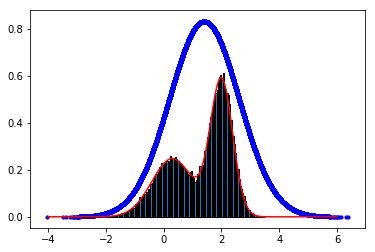

In [3]:
def f1(x):
    return (0.3*np.exp(-(x-0.3)**2) + 0.7* np.exp(-(x-2.)**2/0.3))/1.2113
x = np.arange(-4.,6.,0.01)
plt.figure()
plt.plot(x,f1(x),color = "red")

size = int(1e+05)
sigma = 1.2
z = np.random.normal(loc = 1.4,scale = sigma, size = size)
qz = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5*(z-1.4)**2/sigma**2)
k = 2.5
plt.scatter(z,k*qz,marker='o',c='blue',s=10)
#z = np.random.uniform(low = -4, high = 6, size = size)
#qz = 0.1
#k = 10
u = np.random.uniform(low = 0, high = k*qz, size = size)

pz =  0.3*np.exp(-(z-0.3)**2) + 0.7* np.exp(-(z-2.)**2/0.3)
sample = z[pz >= u]
plt.hist(sample,bins=150, normed=True, edgecolor='black')

# 11.2 Markov Chain Monte Carlo

# 11.2.2 The Metropolis-Hastings algorithm